In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

In [2]:
data = pd.read_csv('../main/log/deep_mutation_impact_120924.csv', names = ['dataset', 'algorithm', 'seed', 'operator', 'size',
                                                                   'nodes', 'depth', 'operation_index', 
                                                                   'train_variation', 'test_variation', 'train_output'])

In [3]:
data['train_output'] = data['train_output'].apply(lambda x: float(x.split('(')[-1].split(')')[0])) 

In [4]:
data.tail()

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_variation,test_variation,train_output
3301825,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1994,0.982906,0,43611868.0
3301826,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1995,0.982906,0,49729872.0
3301827,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1996,0.982906,0,44211932.0
3301828,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1997,0.982906,0,43268044.0
3301829,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1998,0.982906,0,46128488.0


In [5]:
data.drop_duplicates(subset = ['dataset', 'algorithm', 'seed', 'operator'], keep = 'last')

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_variation,test_variation,train_output
3242,yatch,SLIM+2SIG,0,inflate,2000,40422,2007,-1,1.000000,0,2.965600e+01
5240,yatch,SLIM+2SIG,0,deflate,2000,40369,2006,1998,1.000000,0,2.944930e+01
8483,airfoil,SLIM+2SIG,0,inflate,2000,45696,2007,-1,1.000000,0,-1.907100e+00
10481,airfoil,SLIM+2SIG,0,deflate,2000,45667,2006,1998,0.013972,0,-1.959600e+00
13724,concrete_slump,SLIM+2SIG,0,inflate,2000,36822,2007,-1,1.000000,0,-6.788600e+00
...,...,...,...,...,...,...,...,...,...,...,...
3291347,ppb,SLIM*1NORM,29,deflate,2000,30015,2005,1998,0.320611,0,inf
3294590,bioav,SLIM*1NORM,29,inflate,2000,30124,2006,-1,0.000000,0,0.000000e+00
3296588,bioav,SLIM*1NORM,29,deflate,2000,30109,2005,1998,0.000000,0,0.000000e+00
3299831,ld50,SLIM*1NORM,29,inflate,2000,30030,2006,-1,0.982906,0,4.493773e+07


In [6]:
data.algorithm.unique()

array(['SLIM+2SIG', 'SLIM*1SIG', 'SLIM*1NORM'], dtype=object)

In [7]:
data.head()

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_variation,test_variation,train_output
0,yatch,SLIM+2SIG,0,inflate,2,48,9,-1,1.0,0,0.9550
1,yatch,SLIM+2SIG,0,inflate,3,69,10,-1,1.0,0,0.9572
2,yatch,SLIM+2SIG,0,inflate,4,94,11,-1,1.0,0,1.1140
3,yatch,SLIM+2SIG,0,inflate,5,109,12,-1,1.0,0,1.5406
4,yatch,SLIM+2SIG,0,inflate,6,128,13,-1,1.0,0,1.5388


In [8]:
data.query("operator == 'deflate'")['size'].unique()

array([  50,  200, 1000, 2000], dtype=int64)

In [9]:
data.tail()

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_variation,test_variation,train_output
3301825,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1994,0.982906,0,43611868.0
3301826,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1995,0.982906,0,49729872.0
3301827,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1996,0.982906,0,44211932.0
3301828,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1997,0.982906,0,43268044.0
3301829,ld50,SLIM*1NORM,29,deflate,2000,30015,2005,1998,0.982906,0,46128488.0


In [10]:
data.query("operator == 'deflate'")['size'].unique()

array([  50,  200, 1000, 2000], dtype=int64)

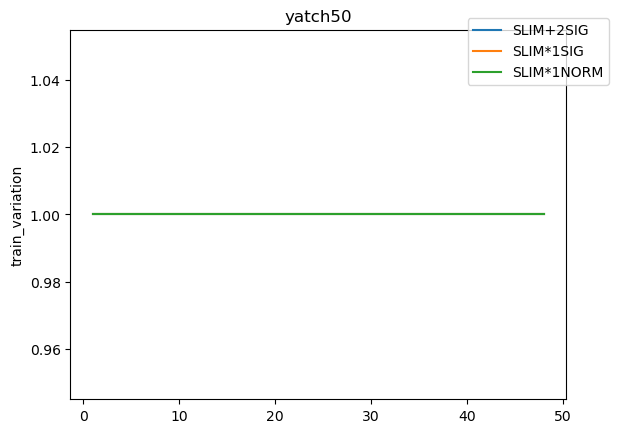

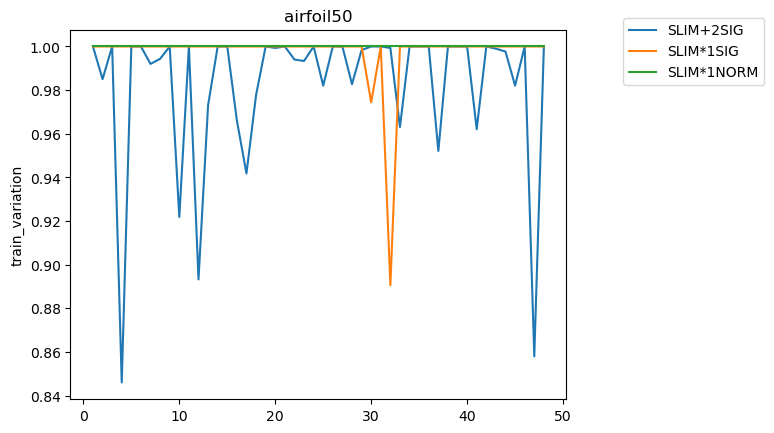

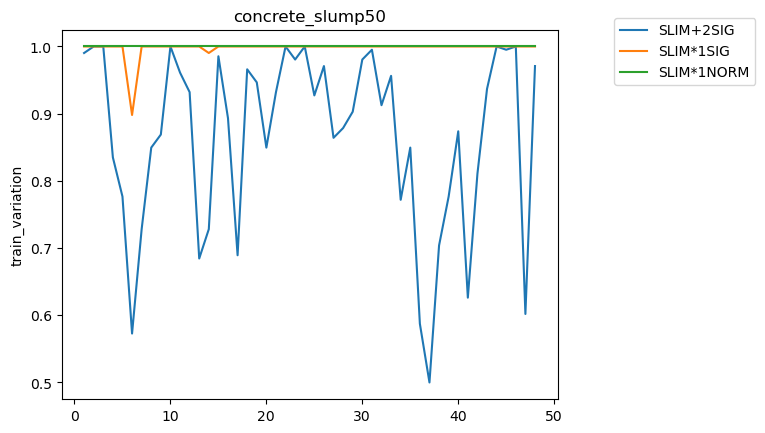

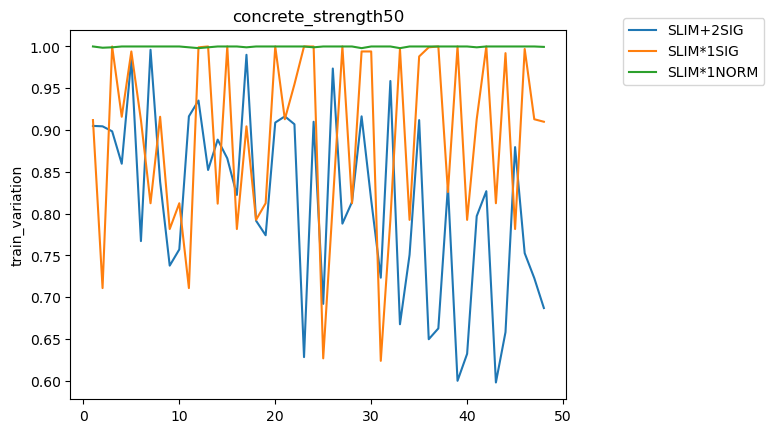

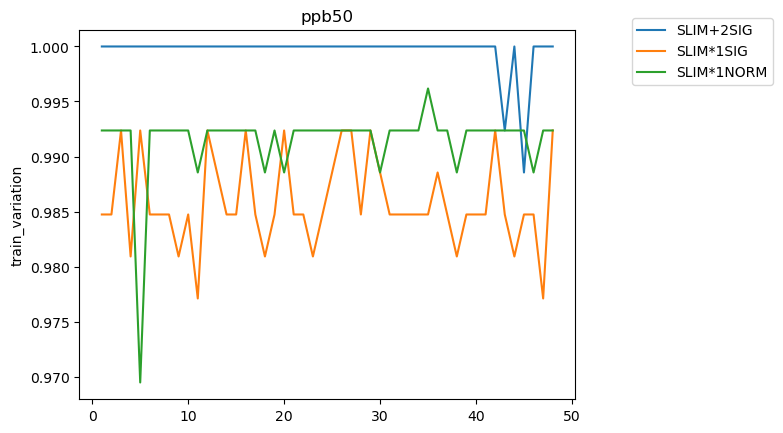

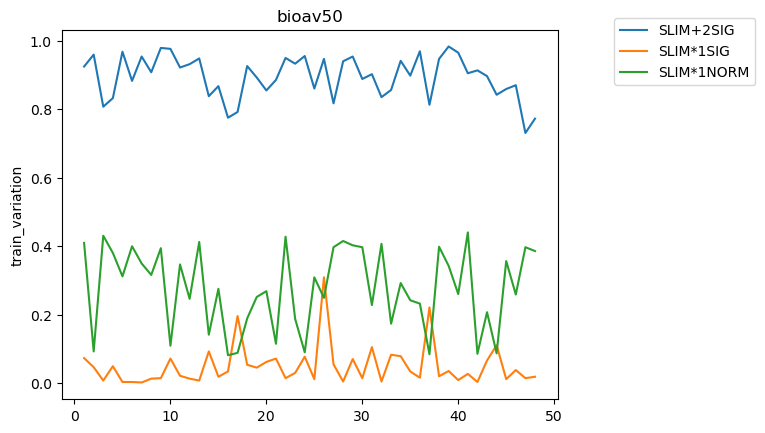

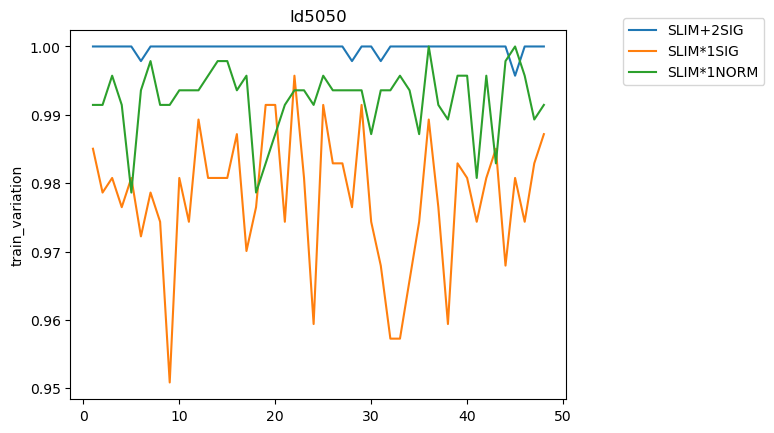

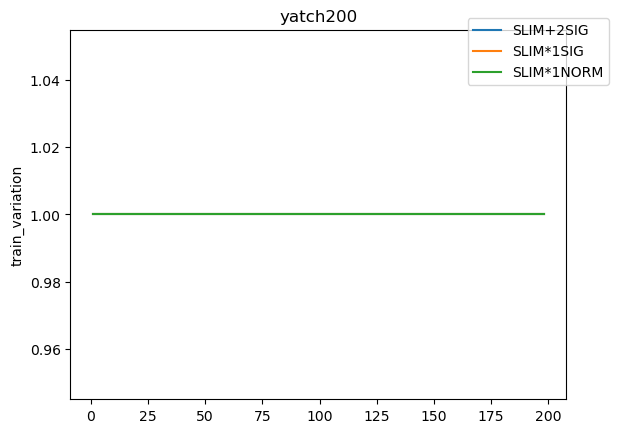

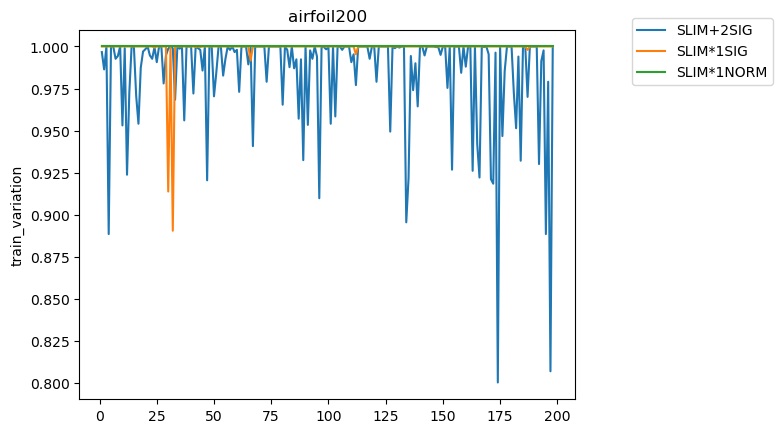

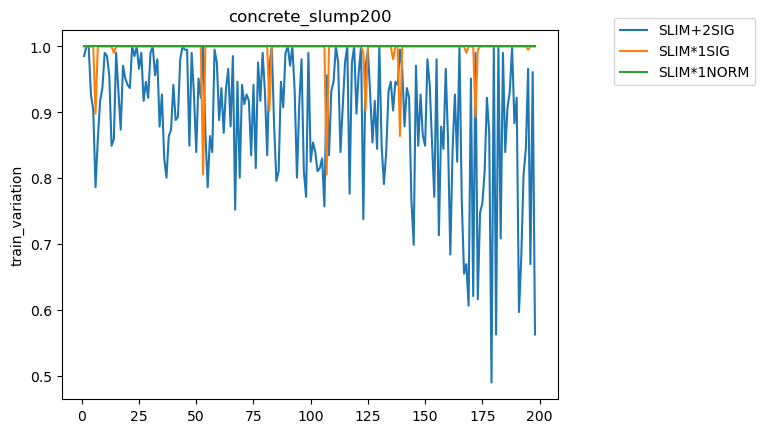

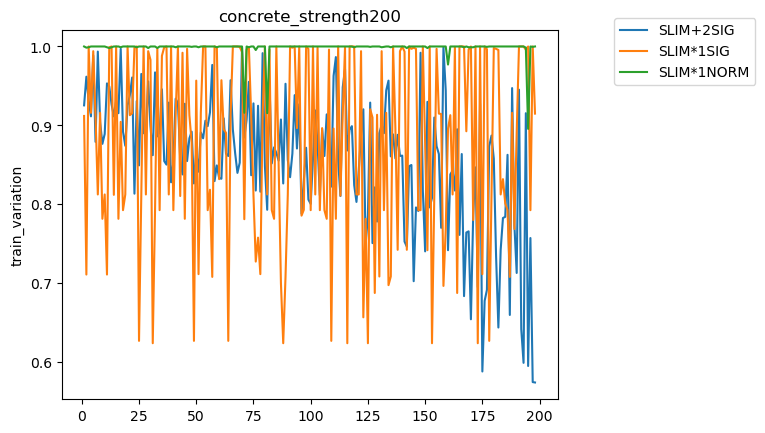

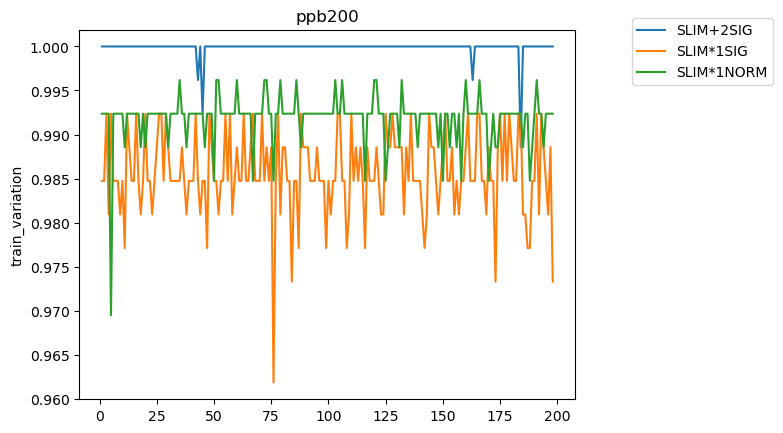

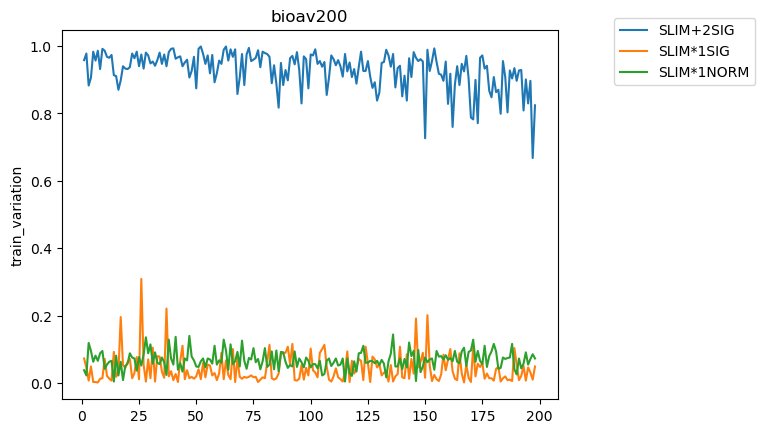

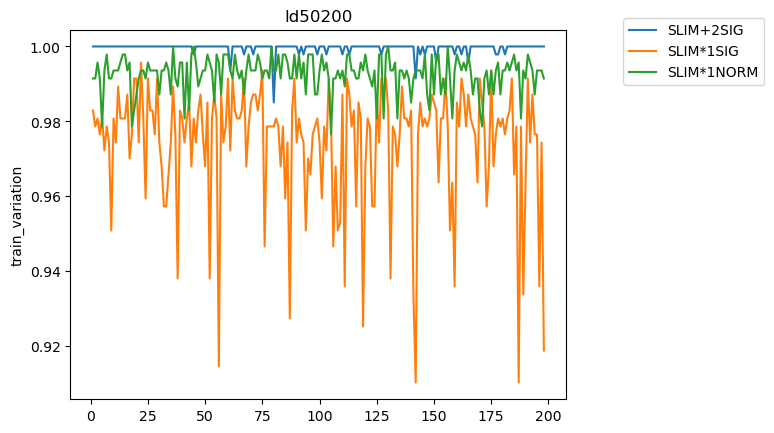

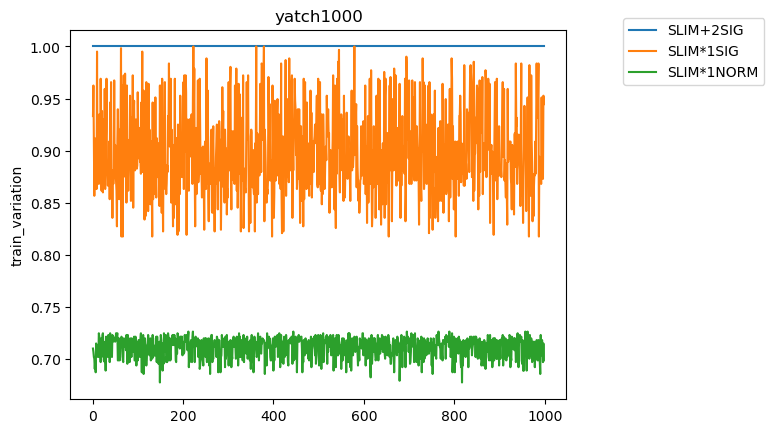

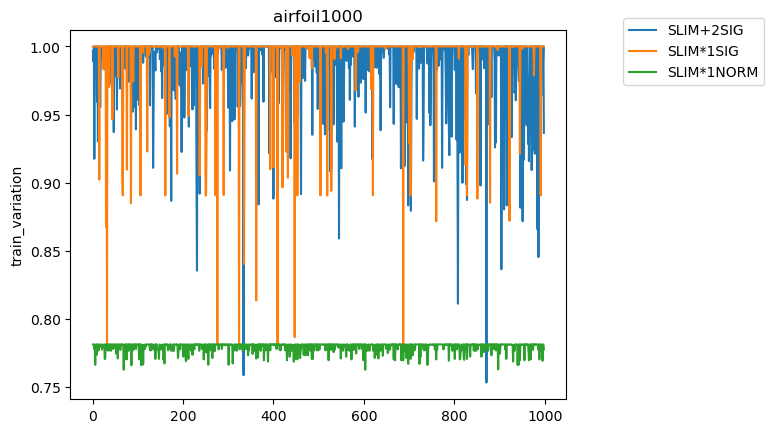

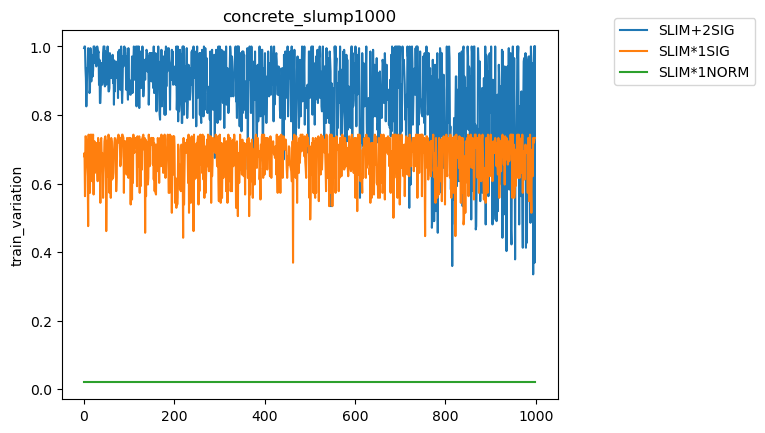

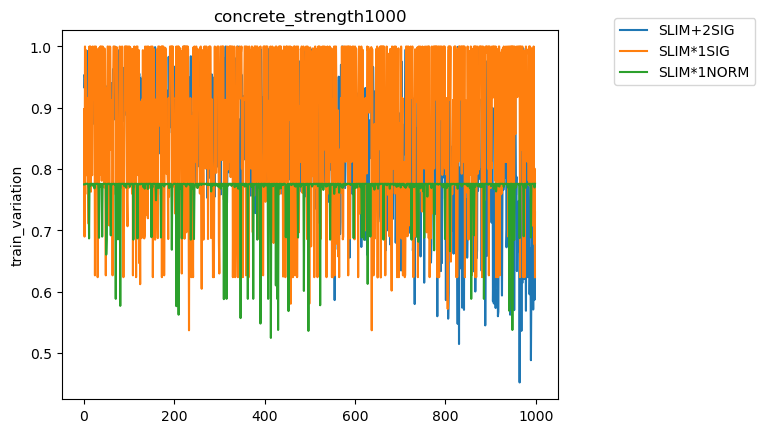

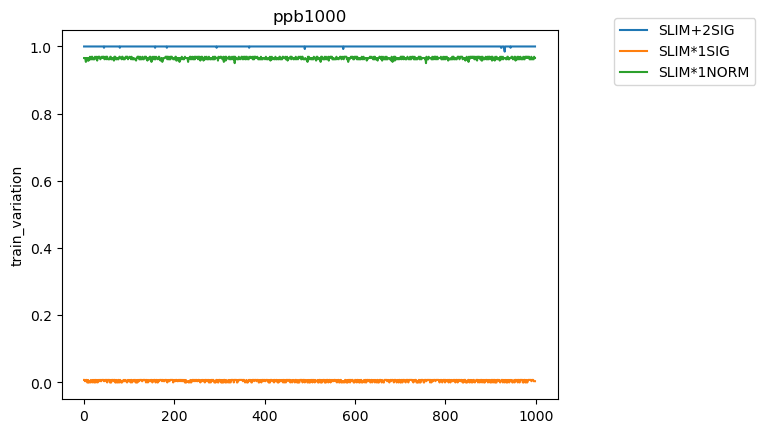

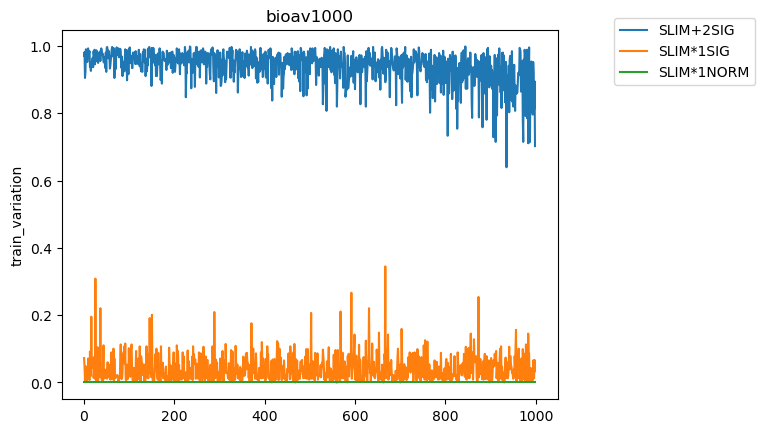

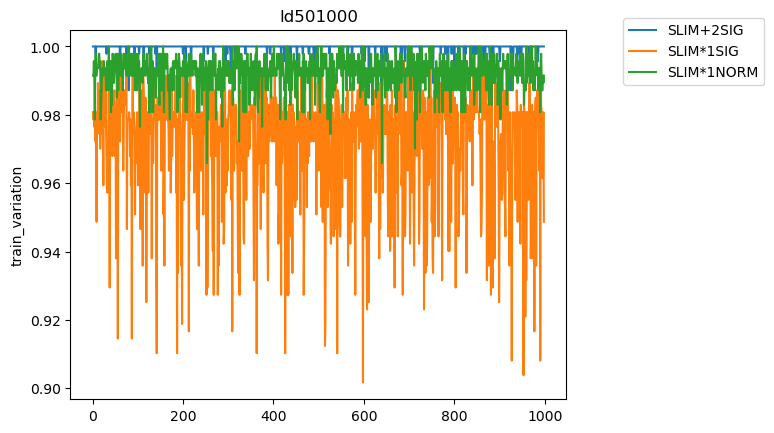

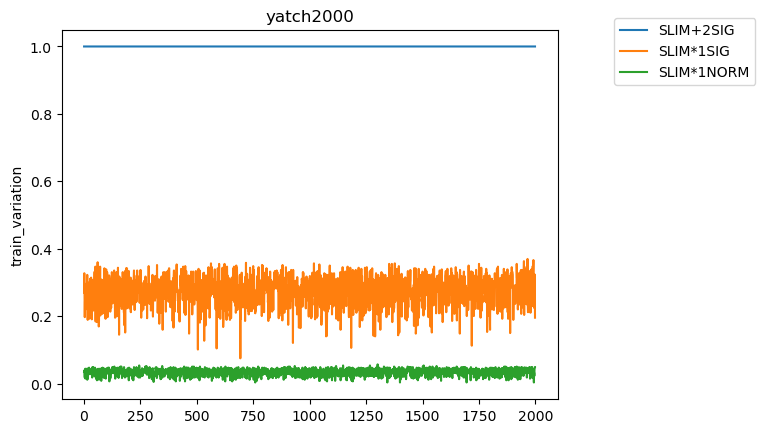

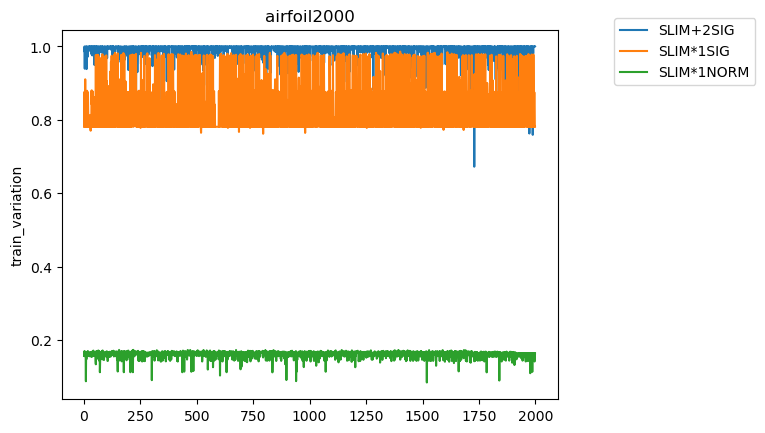

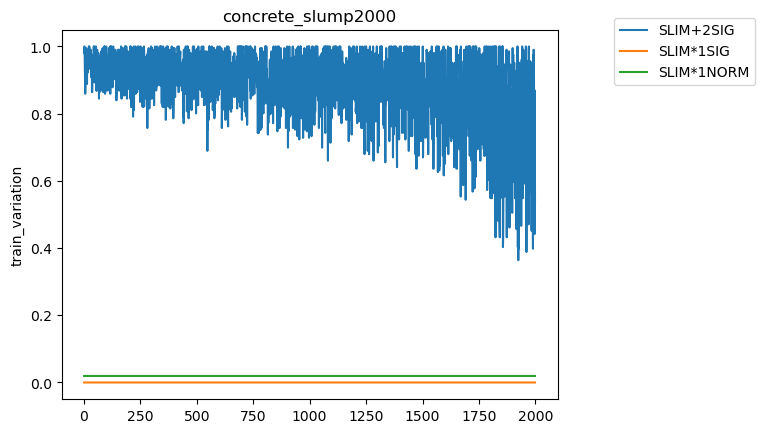

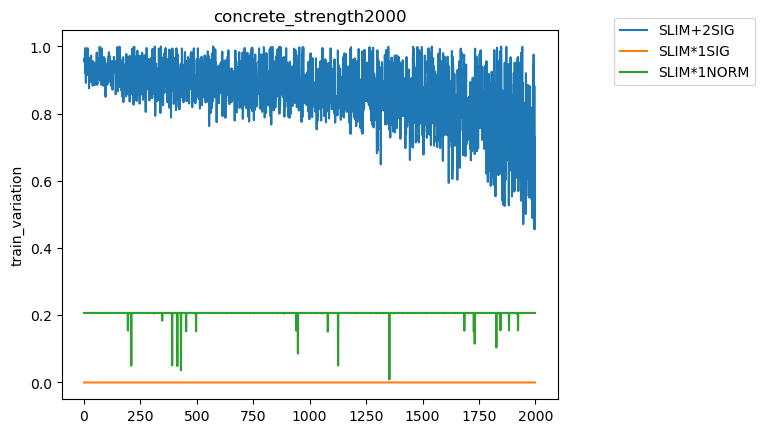

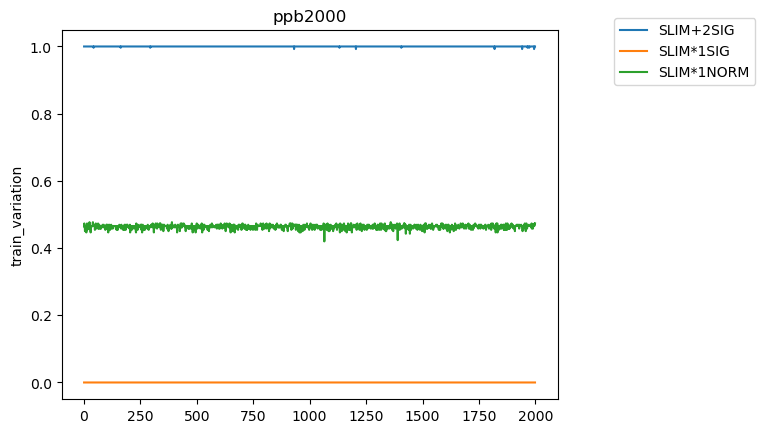

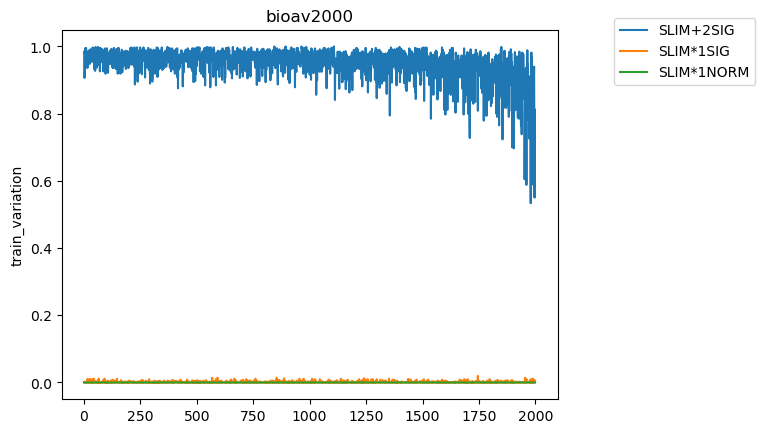

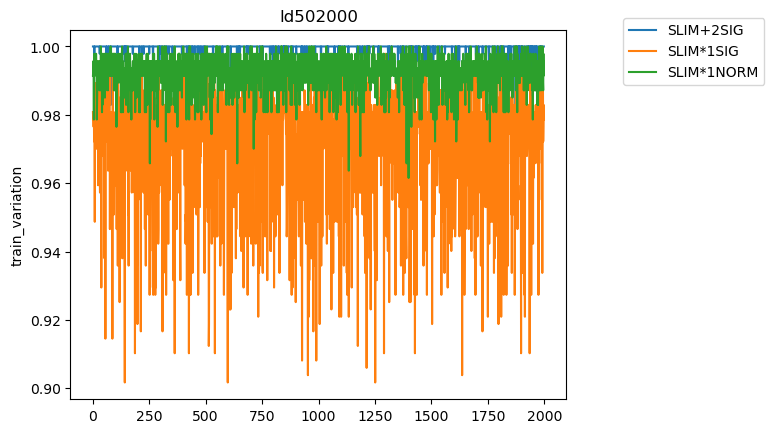

In [11]:
for size in data.query("operator == 'deflate'")['size'].unique():
    for ds in data.dataset.unique():
        # print(ds)
        # gs = gridspec.GridSpec(3, 1)
        # gs.update( wspace=0.6, hspace =  0.5)
        # for i, metric in enumerate(['train_variation', 'train_similarity', 'train_distance']):
        # ax = pl.subplot(gs[i, 0]) 
        for algo in data.algorithm.unique():
            grouped = data.query("dataset == @ds and algorithm == @algo and operator == 'deflate' and size == @size ")[[
                'operation_index', 'train_variation']].groupby(
                ['operation_index']).median()
            grouped.reset_index(inplace = True)
            plt.plot(grouped.operation_index.values, grouped['train_variation'], label = algo)
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.ylabel('train_variation')
        plt.title(ds + str(size))
        plt.show()

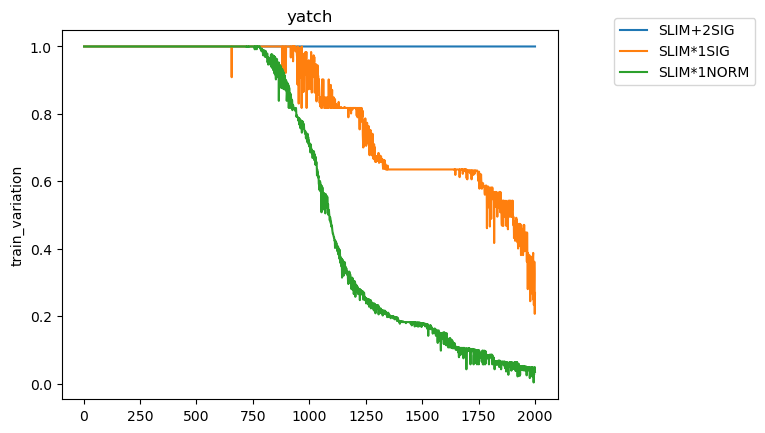

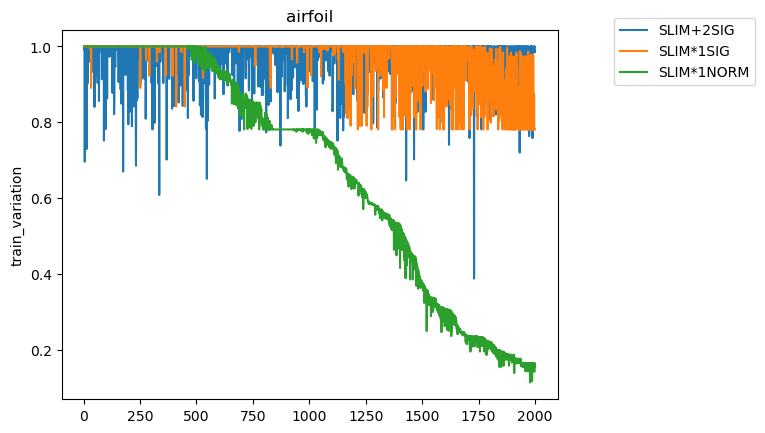

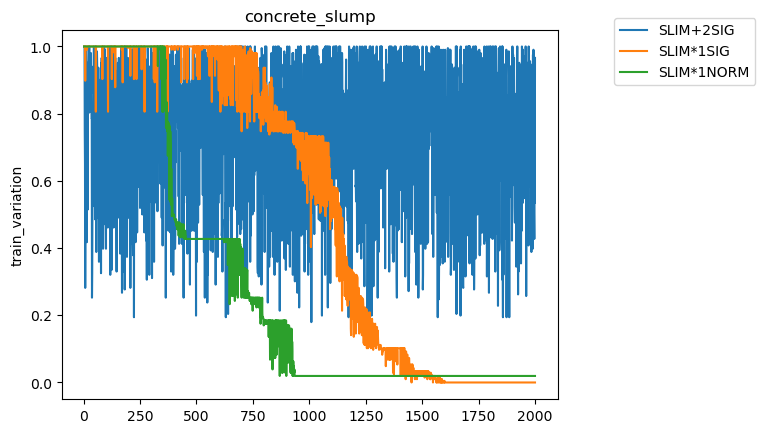

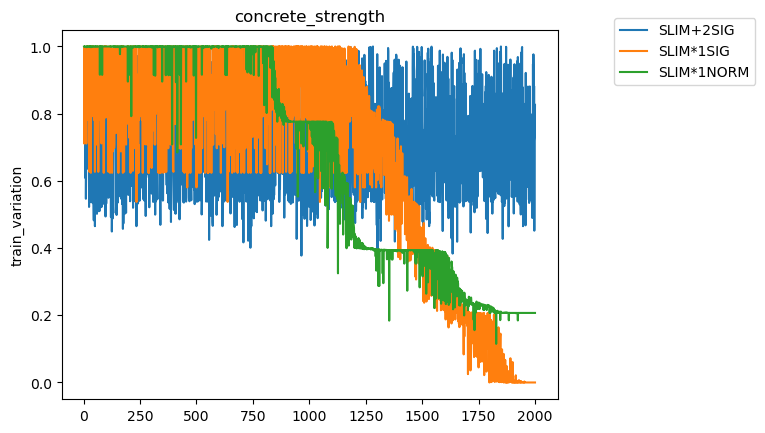

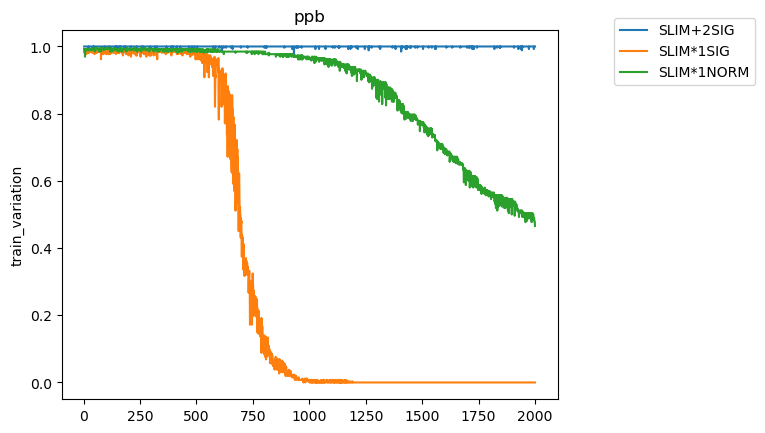

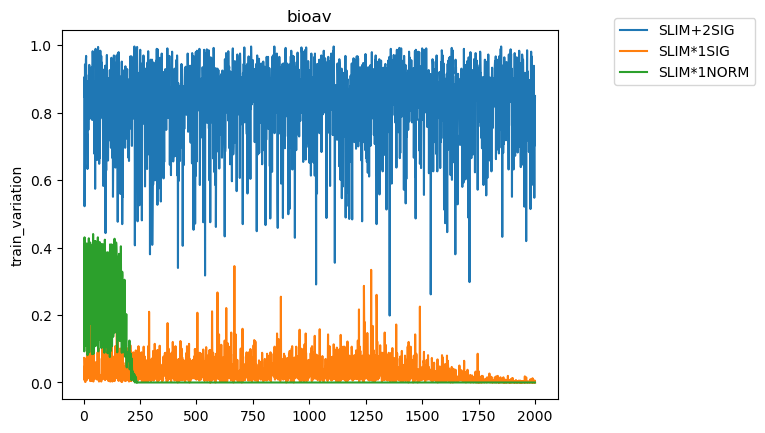

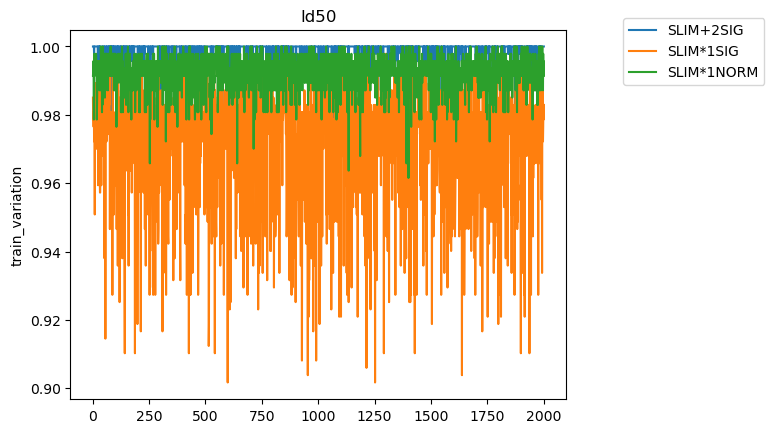

In [12]:
for ds in data.dataset.unique():
    
    # gs = gridspec.GridSpec(3, 1)
    # gs.update( wspace=0.6, hspace =  0.5)
    # for i, metric in enumerate(['train_variation', 'train_similarity', 'train_distance']):
    # ax = pl.subplot(gs[i, 0]) 
    for algo in data.algorithm.unique():
        grouped = data.query("dataset == @ds and algorithm == @algo and operator == 'inflate' ")[[
            'size', 'train_variation']].groupby(
            ['size']).median()
        grouped.reset_index(inplace = True)
        plt.plot(grouped['size'].values, grouped['train_variation'], label = algo)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('train_variation')
    plt.title(ds)
    plt.show()

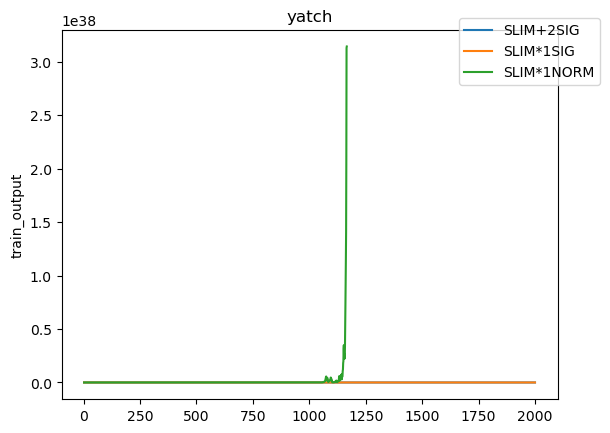

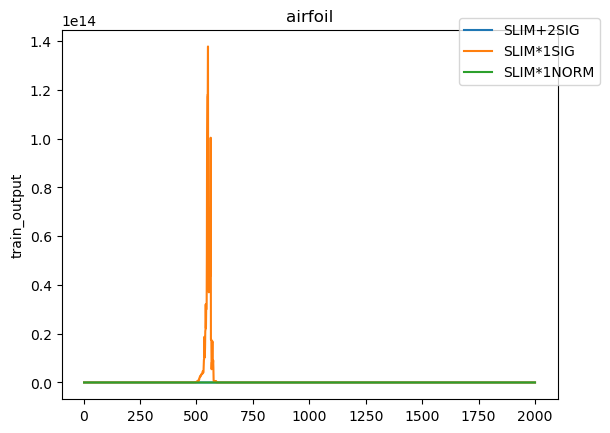

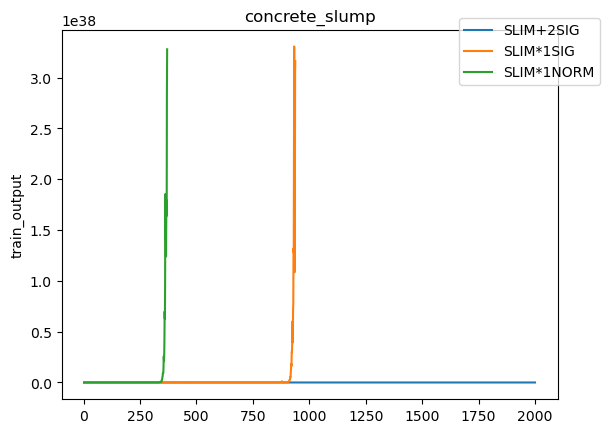

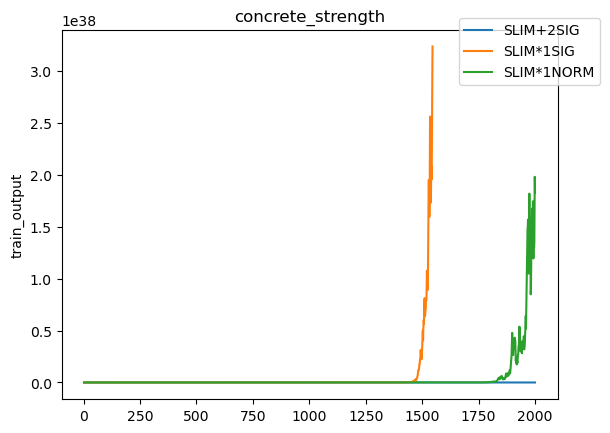

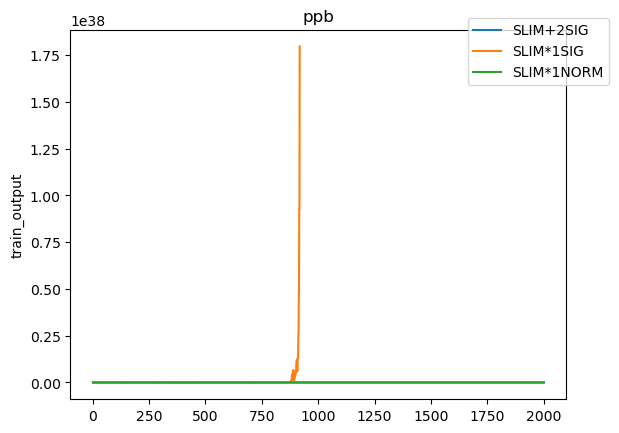

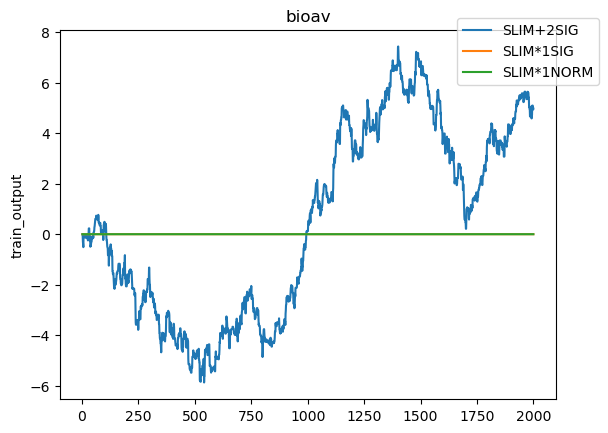

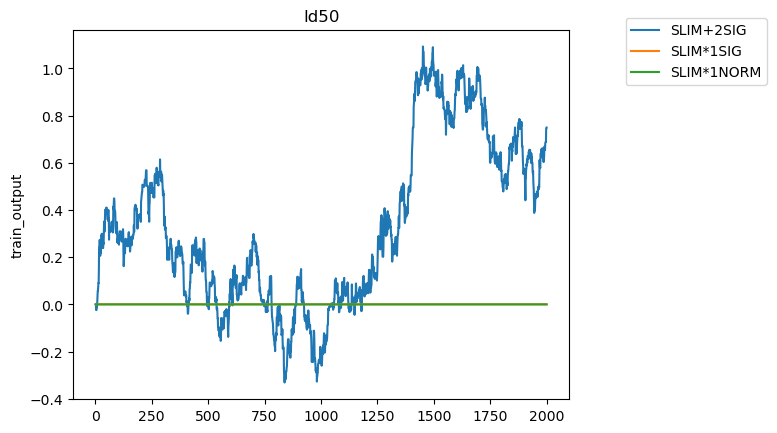

In [13]:
for ds in data.dataset.unique():
    
    # gs = gridspec.GridSpec(3, 1)
    # gs.update( wspace=0.6, hspace =  0.5)
    # for i, metric in enumerate(['train_variation', 'train_similarity', 'train_distance']):
    # ax = pl.subplot(gs[i, 0]) 
    for algo in data.algorithm.unique():
        grouped = data.query("dataset == @ds and algorithm == @algo and operator == 'inflate' and seed == 7")[[
            'size', 'train_variation', 'train_output']]
        # .groupby(
            # ['size']).median()
        
        # grouped.reset_index(inplace = True)
        grouped['size'] = grouped['size'].astype(int)
        plt.plot(grouped['size'].values, grouped['train_output'], label = algo)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('train_output')
    plt.title(ds)
    plt.show()